# Gradient Boosting Regressor Model

## Scaling and transformations
Now before proceeding to building the model I'm going to do the X/y split and scale/transform the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/cleaned/6.jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_euros,cost_of_living,purchasing_power,job_field
0,2023,Data DevOps Engineer,Data Engineering,Germany,2,4,2,Germany,3,87411,127.47,685.74,Data Engineering
1,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,2,171120,143.34,1193.80,Data Engineering
2,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,2,75256,143.34,525.02,Data Engineering
3,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,2,195040,143.34,1360.68,Data Science
4,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,2,85836,143.34,598.83,Data Science


## X/y Split
The target will be "salary_in_euros". I also want to drop the columns 'job_title' and 'job_category' because they are redundant for creating the model since I already added the column 'job_field' before with the categories that I want to work with.
(edit) After some trial and error testing I decided to drop the columns employee_residence and company_location since the high amount of unique values was influencing the performance of the model and causing overfitting. I dropped also purchasing power because that was a feature that I added from the target column for EDA purposes so it makes no sense in using it to predict the target value.

In [3]:
X = df.drop(columns=['job_title', "job_category", 'salary_in_euros', 'purchasing_power'], axis=1)
y = df['salary_in_euros']

<Axes: xlabel='salary_in_euros', ylabel='Count'>

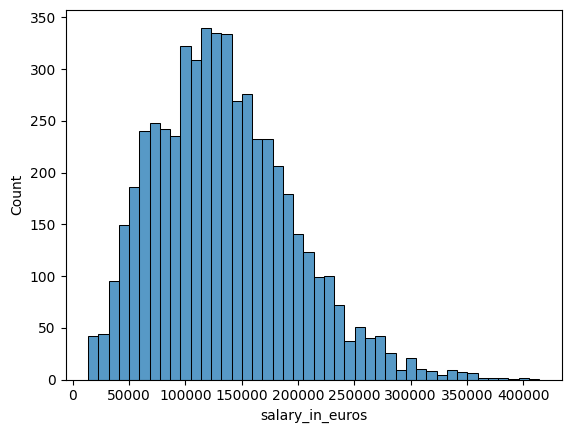

In [32]:
sns.histplot(y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4264, 9)

(1066, 9)

(4264,)

(1066,)

## Dividing X into numerical and categorical

In [6]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [7]:
X_train_num.head()

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living
2804,2023,3,4,3,2,143.34
3858,2023,3,4,3,2,143.34
511,2023,2,4,3,2,143.34
62,2023,3,4,3,2,143.34
3034,2023,3,4,1,2,143.34


In [8]:
X_test_num.head()

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living
1323,2023,3,4,3,2,143.34
1839,2023,3,4,3,2,143.34
798,2023,3,4,1,2,143.34
3856,2023,4,4,3,2,143.34
4553,2022,3,4,3,2,106.46


In [9]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,4264.0,2022.685038,0.603377,2020.00,2022.00,2023.00,2023.00,2023.00
experience_level,4264.0,2.656895,0.678589,1.00,2.00,3.00,3.00,4.00
employment_type,4264.0,3.984522,0.183138,1.00,4.00,4.00,4.00,4.00
work_setting,4264.0,2.115385,0.975808,1.00,1.00,3.00,3.00,3.00
company_size,4264.0,2.065197,0.345160,1.00,2.00,2.00,2.00,3.00
cost_of_living,4264.0,139.699977,15.292912,27.37,143.34,143.34,143.34,197.89


## Scaling numerical features
Since the numerical features have very different ranges I'm going to use the Standard Scaler.

In [10]:
# from sklearn.preprocessing import MinMaxScaler
# import pickle

# scaler = MinMaxScaler()
# scaler.fit(X_train_num)

# path = "../ml/scalers/"
# scaler_file_name = "MinMaxScaler.pkl"

# with open(path + scaler_file_name, "wb") as file:
#     pickle.dump(scaler, file)

# X_train_num_transformed = scaler.transform(X_train_num)
# X_test_num_transformed = scaler.transform(X_test_num)

In [11]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
scaler.fit(X_train_num)

path = "../ml/scalers/"
scaler_file_name = "standard_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_transformed = scaler.transform(X_train_num)
X_test_num_transformed = scaler.transform(X_test_num)

In [12]:
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns , index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns , index=X_test_num.index)

In [13]:
X_train_num_transformed_df.head()

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living
2804,0.52206,0.505675,0.084528,0.906653,-0.188911,0.238048
3858,0.52206,0.505675,0.084528,0.906653,-0.188911,0.238048
511,0.52206,-0.968145,0.084528,0.906653,-0.188911,0.238048
62,0.52206,0.505675,0.084528,0.906653,-0.188911,0.238048
3034,0.52206,0.505675,0.084528,-1.143171,-0.188911,0.238048


In [14]:
X_test_num_transformed_df.head()

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living
1323,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048
1839,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048
798,0.522060,0.505675,0.084528,-1.143171,-0.188911,0.238048
3856,0.522060,1.979495,0.084528,0.906653,-0.188911,0.238048
4553,-1.135472,0.505675,0.084528,0.906653,-0.188911,-2.173809


## Encoding categorical features

In [15]:
X_train_cat.head()

,employee_residence,company_location,job_field
2804,United States,United States,Data Engineering
3858,United States,United States,Data Science
511,United States,United States,Data Analysis
62,United States,United States,Data Science
3034,United States,United States,Data Science


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

path = "../ml/encoders/"
encoder_file_name = "one_hot_encoder.pkl"

with open(path + encoder_file_name, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [17]:
encoded_feature_names = encoder.get_feature_names_out(X_train_cat.columns)

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_feature_names, index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_feature_names, index=X_test_cat.index)

In [18]:
X_train_cat_encoded_df.head()

,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,employee_residence_Belgium,employee_residence_Bolivia,employee_residence_Bosnia and Herzegovina,employee_residence_Brazil,employee_residence_Canada,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
X_test_cat_encoded_df.head()

,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,employee_residence_Belgium,employee_residence_Bolivia,employee_residence_Bosnia and Herzegovina,employee_residence_Brazil,employee_residence_Canada,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
X_train_concat = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_train_concat

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3858,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
511,0.522060,-0.968145,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
62,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3034,0.522060,0.505675,0.084528,-1.143171,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3772,0.522060,0.505675,0.084528,-1.143171,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,-2.793004,0.505675,0.084528,-1.143171,-3.086455,-2.299372,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5226,-2.793004,-2.441964,0.084528,-0.118259,2.708633,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
X_test_concat = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)
X_test_concat

,work_year,experience_level,employment_type,work_setting,company_size,cost_of_living,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1839,0.522060,0.505675,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,0.522060,0.505675,0.084528,-1.143171,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3856,0.522060,1.979495,0.084528,0.906653,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4553,-1.135472,0.505675,0.084528,0.906653,-0.188911,-2.173809,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,0.522060,-0.968145,0.084528,-1.143171,2.708633,-5.699385,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5208,-4.450536,-0.968145,0.084528,0.906653,2.708633,-1.899794,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1965,0.522060,0.505675,0.084528,-1.143171,-0.188911,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4538,-1.135472,-0.968145,0.084528,-1.143171,2.708633,0.238048,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.model_selection import GridSearchCV

n_estimators = [80,100,120]
learning_rate = [0.01, 0.1, 1]
max_depth = [4, 6, 8]
min_samples_split = [3,5,7]
min_samples_leaf = [0.5,1,2]

grid = {'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
       }


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
import os

gb_reg = GradientBoostingRegressor()


In [24]:
# grid_search = GridSearchCV(estimator = gb_reg, param_grid = grid, cv = 5)
# grid_search.fit(X_train_concat, y_train)

In [25]:
# grid_search.best_params_

In [26]:
# print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))
# print("The performace of the Gradient Boost Regressor using the best gridsearchcv hyperpameters is {:.2f}".format(grid_search.best_estimator_.score(X_test_concat, y_test)))


In [27]:
import os

gb_reg = GradientBoostingRegressor() #alpha=30, max_iter=100, selection='random', tol=0.1)

# pt = PowerTransformer()
# pt.fit(y_train)
# y_train_trans = pt.transform(y_train)
# y_test_trans = pt.transform(y_test)
# save with with pickle: "power_transformer_y.pkl"
# gb_reg.fit(X_train_concat, y_train_trans)
# y_train_trans_pred = gb_reg.predict(X_train_concat)
# y_train_pred = pt.inverse_transform(y_train_trains_pred)
# y_test_pred = pt.inverse_transform(y_test_trains_pred)
gb_reg.fit(X_train_concat, y_train)

path = "../ml/models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

    filename = "Gradient Boost Regressor.pkl"
    with open(path+filename, "wb") as file:
        pickle.dump(lasso_reg, file)

In [28]:
y_train_pred = gb_reg.predict(X_train_concat)
y_test_pred  = gb_reg.predict(X_test_concat)

In [29]:
y_test_pred

array([149723.28608774, 174545.02542669, 149640.78112891, ...,
       171533.37212799, 134628.95602249,  77442.35522275])

In [30]:
import functions

functions.error_metrics_report(y_train, y_test, y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,37131.90,35723.96
1,MSE,2406961222.62,2087740007.21
2,RMSE,49060.79,45691.79
3,R2,0.37,0.38


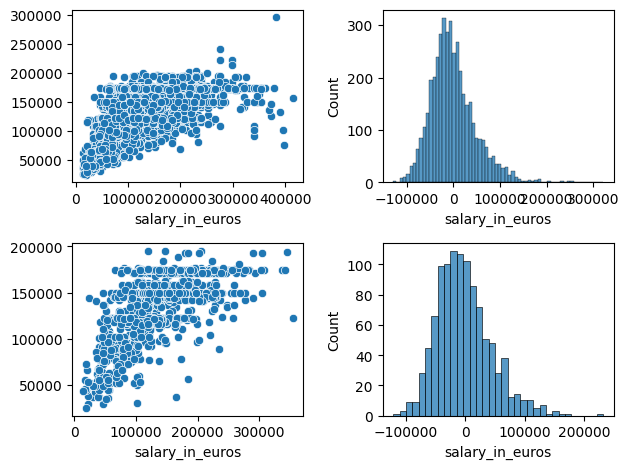

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(2,2)
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0,0])
sns.histplot(y_train - y_train_pred, ax=ax[0,1])
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1,0])
sns.histplot(y_test - y_test_pred, ax=ax[1,1])
plt.tight_layout()
plt.show()

### Conclusion:
